# Numerical Exercises 03

## Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1. <span style="color:red"> By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. <span style="color:red"> By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

<span style="color:red">Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>. <span style="color:blue"> As usual, in computing statistical uncertainties, use data blocking.</span>

### Options 

Options are financial contracts that give the holder the *right*, but not the *obligation*, to trade an underlying asset at a specified price $K$ (strike price) on a future date $T$. The holder and the writer will choose to exercise the option if it is profitable.

- A **call option** gives the right (not the obligation) to *buy* the asset:  
  Profit = $\text{max}[0, S(T) - K]$

- A **put option** gives the right to *sell* the asset:  
  Profit = $\text{max}[0, K - S(T)]$

Only the option writer is obligated to fulfill the contract if the holder chooses to exercise the option. Those contracts are used to hedge against the risk of price fluctuations in the underlying asset.

### Option pricing with Geometric Brownian motion

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

To evaluate the option price in function of time we can simulate with:

$$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
where $W(t)\sim\mathcal{N}(0,t)$.

Since the increments of $W$ are independent and normally distributed, the simple recursive procedure for sampling discretized values of $S\sim GBM(\mu,\sigma^2)$ at $t_1 < t_2 < … < t_n$ is:

$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
with $Z_i \sim \mathcal{N}(0,1)$


Considering the present value of the profit, discounted due to the interest a bank would have guaranteed with a deposit at time $t_0=0$, the calculation of the option price corresponds to the calculation of the expected value (average) for the discounted profit based on the distribution of prices at expiry.

$$\text{call option price: } \langle e^{-rT} \text{max}[0, S(T) - K] \rangle$$
$$\text{put option price: } \langle e^{-rT} \text{max}[0, K - S(T)] \rangle$$



### Solution

To evaluate the option price i have implemented the class `gbm` that simulates as said above a geometric brownian motion

```c++
void gbm::update(){
    double z = rand_gen.Gauss(0., 1.);
    S_0 = S_0*exp((mu - 0.5*sigma*sigma)*dt + sigma*sqrt(dt)*z);
    t += dt;
}
```

Then, I used data blocking to evaluate the estimation of both the put option price and the call option price for each block. The program takes the number of steps for the Geometric Brownian Motion (GBM) simulation as input; to evaluate with direct sampling, you can pass 1 step.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = 'serif'

direct_df = pd.read_csv('data/option_prices_1.dat', sep=' ')
steps_df = pd.read_csv('data/option_prices_100.dat', sep=' ')
call_theory = 14.975790778311286
put_theory = 5.4595325819072364

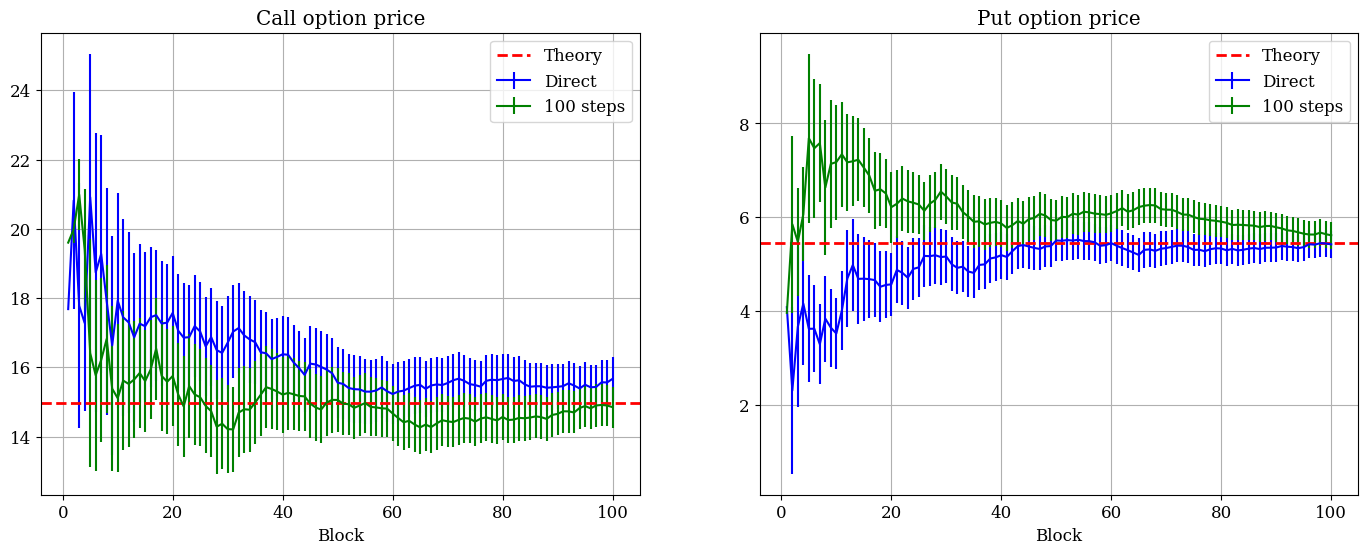

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(17, 6))
ax[0].errorbar(direct_df['#Block'], direct_df['Call_Ave'], yerr=direct_df['Call_Error'], label='Direct', color='blue')
ax[0].errorbar(steps_df['#Block'], steps_df['Call_Ave'], yerr=steps_df['Call_Error'], label='100 steps', color='green')
ax[0].axhline(call_theory, color='r', ls = 'dashed', label='Theory', linewidth=2)
ax[0].set_xlabel('Block')
ax[0].set_title('Call option price')
ax[0].legend()
ax[0].grid()

ax[1].errorbar(direct_df['#Block'], direct_df['Put_Ave'], yerr=direct_df['Put_Error'], label='Direct', color='blue')
ax[1].errorbar(steps_df['#Block'], steps_df['Put_Ave'], yerr=steps_df['Put_Error'], label='100 steps', color='green')
ax[1].axhline(put_theory, color='r',ls='dashed', label='Theory', linewidth=2)
ax[1].set_xlabel('Block')
ax[1].set_title('Put option price')
ax[1].legend()
ax[1].grid()

plt.legend()
plt.show()

For the call option, the 100-step method seems to converge slightly faster; No significant differences are noticeable for the put option.